In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Wholesale customers data.txt", sep=",")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df['Channel'] = df['Channel'].astype('category')
df['Region'] = df['Region'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


In [6]:
x = df
num_cols = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]

cat_cols = ["Channel","Region"]
dummies = pd.get_dummies(x[cat_cols])
dummies.head()

,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [7]:
X1 = x[num_cols]
X2 = pd.concat([dummies,X1], axis=1)
X = X2

In [8]:
y = df['Frozen']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [10]:
X_train.shape

(330, 11)

In [11]:
X_test.shape

(110, 11)

In [12]:
y_train.shape

(330,)

In [13]:
y_test.shape

(110,)

In [14]:
X_test0 = X_test
y_test0 = y_test

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components= None)

In [16]:
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

In [17]:
explained_variance = pca.explained_variance_ratio_

In [18]:
print("Variance explained by each principal component")
list(explained_variance)

Variance explained by each principal component


[0.465957848790681,
 0.4047304413659375,
 0.06915995278940289,
 0.03775645653102067,
 0.0160319192130899,
 0.00636337948750899,
 8.365303815687851e-10,
 6.566091152588368e-10,
 3.2921975027298335e-10,
 2.5915946675199255e-34,
 3.171528426384797e-36]

In [19]:
i = 2
from sklearn.decomposition import PCA
pca = PCA(n_components = i)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.465957848790681, 0.4047304413659375]

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


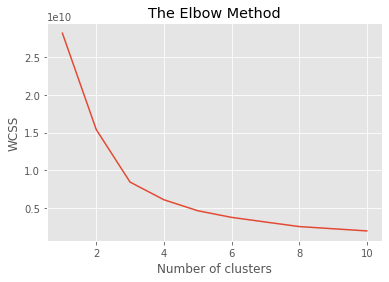

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

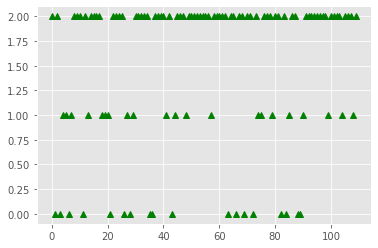

In [21]:
X3 = X_test
kmeans = KMeans(n_clusters =3, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X3)
plt.plot(y_means, 'g^')
plt.show()

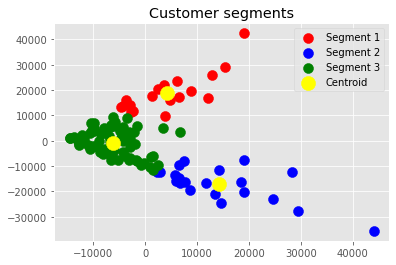

In [22]:
plt.scatter(X3[y_means == 0, 0], X3[y_means == 0, 1], s=100, c='red', label ='Segment 1')
plt.scatter(X3[y_means == 1, 0], X3[y_means == 1, 1], s=100, c='blue', label ='Segment 2')
plt.scatter(X3[y_means == 2, 0], X3[y_means == 2, 1], s=100, c='green', label ='Segment 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroid')

plt.title('Customer segments')
plt.legend()
plt.show()

In [23]:
Customer_segment_class = pd.DataFrame(y_means)
Customer_segment_class.columns = ['Customer_segment_class']
X_test2 = X_test0.reset_index(drop=True)

Customer_segments = pd.concat([Customer_segment_class, X_test2], axis=1)
Customer_segments.head(5)

,Customer_segment_class,Channel_1,Channel_2,Region_1,Region_2,Region_3,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,1,0,1,0,0,1537,3748,5838,1859,3381,806
1,0,0,1,0,0,1,5981,14641,20521,2005,12218,445
2,2,1,0,1,0,0,8040,3795,2070,6340,918,291
3,0,0,1,0,1,0,9759,25071,17645,1128,12408,1625
4,1,1,0,0,0,1,27329,1449,1947,2436,204,1333


In [24]:
mask = Customer_segments["Customer_segment_class"] == 0
Customer_segments_1 = Customer_segments[mask]

mask = Customer_segments["Customer_segment_class"] == 1
Customer_segments_2 = Customer_segments[mask]

mask = Customer_segments["Customer_segment_class"] == 2
Customer_segments_3 = Customer_segments[mask]

In [25]:
print(Customer_segments_1.groupby(["Channel_1", "Channel_2"]).size())
print(Customer_segments_2.groupby(["Channel_1", "Channel_2"]).size())
print(Customer_segments_3.groupby(["Channel_1", "Channel_2"]).size())

Channel_1  Channel_2
0          1            18
dtype: int64
Channel_1  Channel_2
0          1             3
1          0            18
dtype: int64
Channel_1  Channel_2
0          1            19
1          0            52
dtype: int64


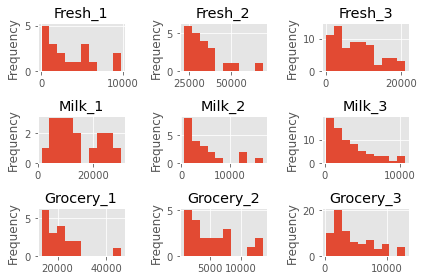

In [26]:
######################
plt.subplot(331)
plt.title("Fresh_1")
Output=None
Customer_segments_1['Fresh'].plot(kind='hist', bins=10)

plt.subplot(332)
plt.title("Fresh_2")
Output=None
Customer_segments_2['Fresh'].plot(kind='hist', bins=10)

plt.subplot(333)
plt.title("Fresh_3")
Output=None
Customer_segments_3['Fresh'].plot(kind='hist', bins=10)

plt.tight_layout()


######################
plt.subplot(334)
plt.title("Milk_1")
Output=None
Customer_segments_1['Milk'].plot(kind='hist', bins=10)

plt.subplot(335)
plt.title("Milk_2")
Output=None
Customer_segments_2['Milk'].plot(kind='hist', bins=10)

plt.subplot(336)
plt.title("Milk_3")
Output=None
Customer_segments_3['Milk'].plot(kind='hist', bins=10)

plt.tight_layout()


#####################
plt.subplot(337)
plt.title("Grocery_1")
Output=None
Customer_segments_1['Grocery'].plot(kind='hist', bins=10)

plt.subplot(338)
plt.title("Grocery_2")
Output=None
Customer_segments_2['Grocery'].plot(kind='hist', bins=10)

plt.subplot(339)
plt.title("Grocery_3")
Output=None
Customer_segments_3['Grocery'].plot(kind='hist', bins=10)

plt.tight_layout()